# Case - Preparando um dataset para o cálculo de indicadores RFM de uma empresa de e-commerce

## Introdução

Uma empresa do ramo de e-commerce tem uma base de dados contendo diversas informações dos seus clientes ao redor do mundo. Fazendo uma análise criteriosa, esta deseja levantar os indicadores RFM destes clientes, sendo RFM definido por:

- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente. Onde ticket médio = média do total gasto por pedido para cada cliente.

Além disso, necessita também de gráficos contendo informações valiosas de valores de venda por país, por produto e por mês.

## Objetivo do projeto

A partir da base de dados disponibilizada pela empresa, gerar um output em csv contendo apenas a identificação dos clientes e as métricas RFM calculadas. E, plotar os seguintes gráficos solicitados:

- Top 10 países com maior valor em vendas;
- Top 10 produtos mais vendidos;
- Valor de venda total por mês;
- Valor de venda total por mês e por país (considerando apenas o top 10).

## Sobre os dados

A tabela contém informações de compras de um e-commerce em 37 países. Contém a identificação do cliente e os dados da compra.

- CustomerID = Código de identificação do cliente;
- Description = Descrição do produto;
- InvoiceNo = Código da fatura;
- StockCode = Código de estoque do produto;
- Quantity = Quantidade do produto;
- InvoiceDate = Data do faturamento (compra);
- UnitPrice = Preço unitário do produto;
- Country = País da compra.

## Análise dos dados e data cleaning

### Importando o dataset

Para realizar a leitura do dataset em arquivo csv, utiliza-se da biblioteca Pandas,

In [1]:
import pandas as pd

customer_df = pd.read_csv('data.csv', encoding = 'unicode_escape')
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Tratando missing data

Feita a importação, utiliza-se da função info() para avaliar os tipos de dados por coluna, a quantidade de entradas no dataset e também a existência ou não de dados nulos.

In [2]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Pelo resultado acima, tem-se um dataset com 541909 entradas. Avaliando a quantidade de dados não nulos por coluna, percebe-se que as colunas "Description" e "CustomerID" não tem todas as entradas preenchidas com dados não nulos.

Isto fica mais claro a partir do código abaixo, onde definiu-se um Data Frame contendo quantidade e porcentagem de dados nulos por coluna do dataset original.

In [3]:
quantity = customer_df.isna().sum()
pct = (customer_df.isna().sum())/customer_df.shape[0]

missing_data = quantity.to_frame('missing_count').join(pct.to_frame('missing_pct'))

# formatando os dados para exibir em porcentagem
missing_data = missing_data.style.format('{:.2%}', subset = ['missing_pct'])

In [4]:
missing_data

,missing_count,missing_pct
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,1454,0.27%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
CustomerID,135080,24.93%
Country,0,0.00%


Assim, em "Description" tem-se 1454 dados nulos, que representa 0,27% dos dados totais desta coluna.

Já em "CustomerID" existem 135080 dados nulos, que representa 24,93% dos dados totais. Esta é uma porcentagem relativamente alta, portanto torna-se necessário avaliar mais afundo se existe algum motivo aparente que justifique estes dados nulos.

Desta forma, pode-se avaliar a distribuição dos nulos ao longo do dataset, utilizando a biblioteca missingno conforme demonstrado abaixo.

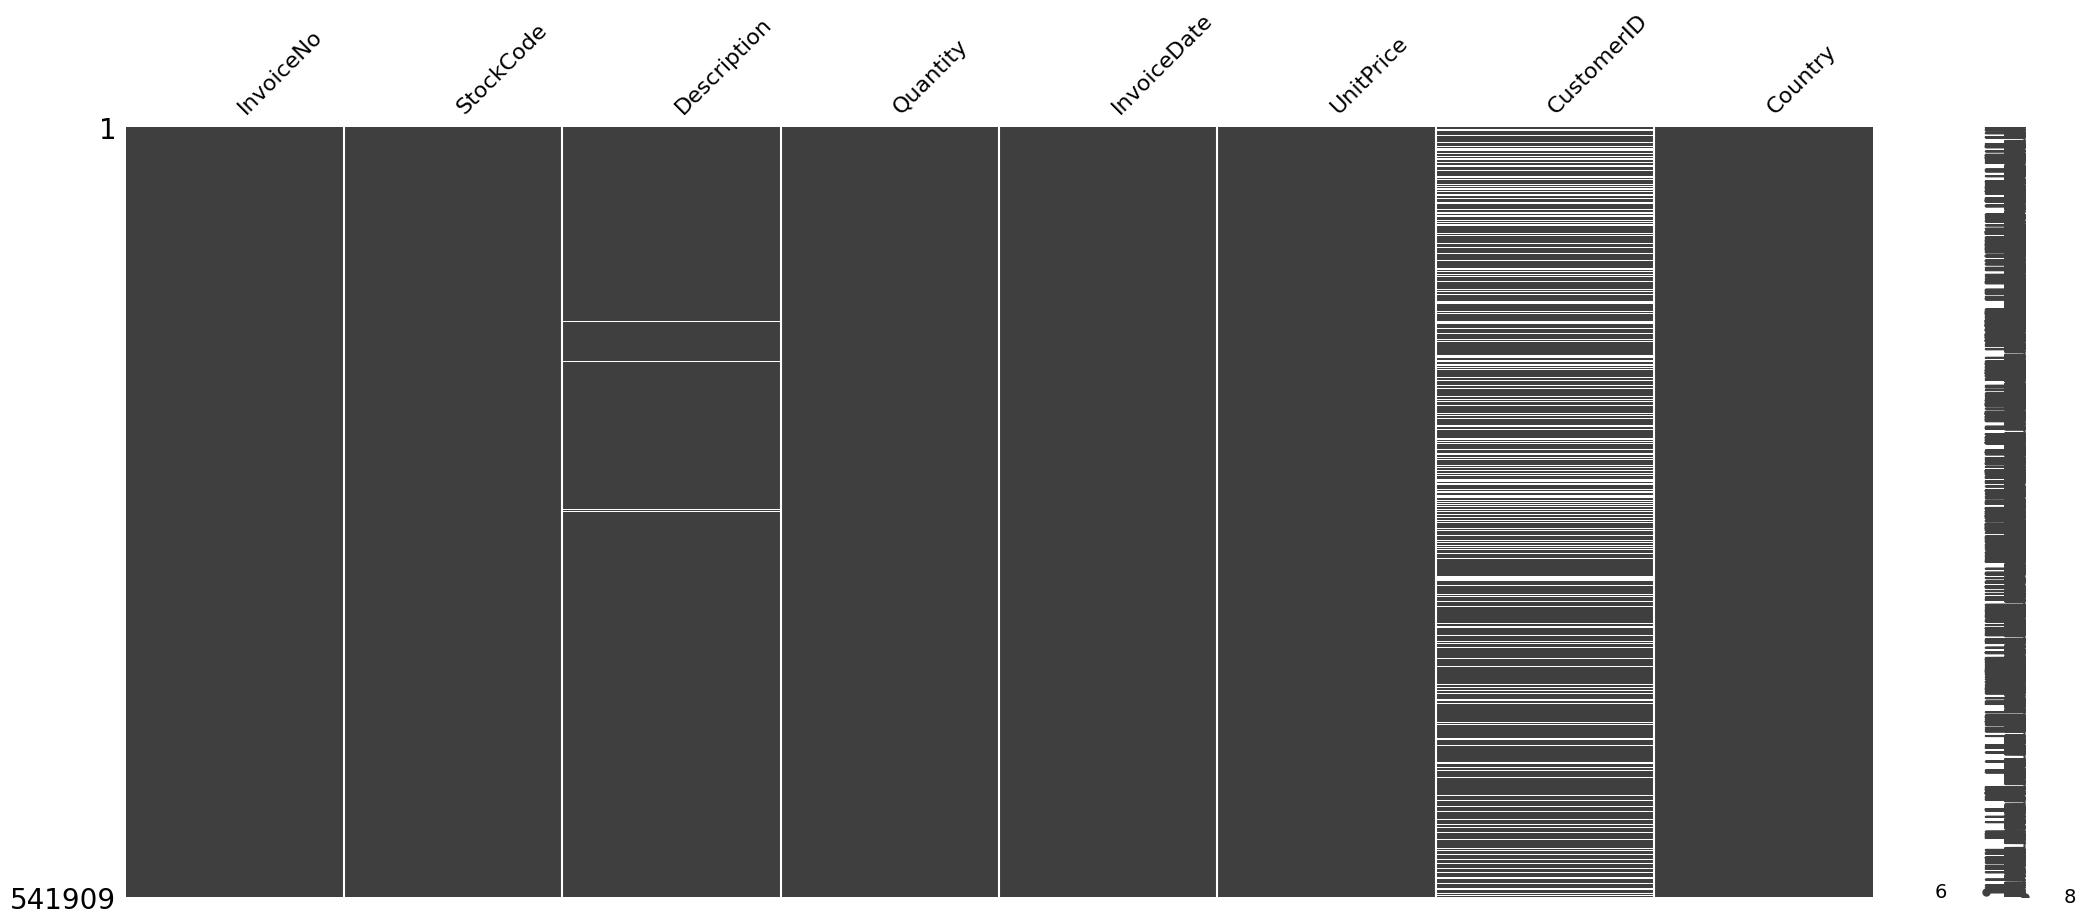

In [5]:
import missingno as msno

msno.matrix(df = customer_df);

Avaliando-se o resultado acima, tanto os dados nulos da coluna "CustomerID" quanto da coluna "Description" estão destribuídos de forma aleatória ao longo do dataset. Ou seja, não é possível estabelecer algum padrão para estes casos.

Exibindo-se então somente as linhas com dados nulos,

In [6]:
customer_df[customer_df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


Observando a quantidade de entradas com algum dado nulo (135080), comparando com as quantidades de dados nulos mostrados por coluna anteriormente (missing_data), é possível afirmar que todas as linhas com dados nulos na coluna "Description" também tem dado nulo na coluna "CustomerID". Isto fica claro filtrando o dataset somente pelos dados nulos de "Description", conforme demonstrado abaixo,

In [7]:
description_missing = customer_df[customer_df['Description'].isna()]

In [8]:
description_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


Tomando somente os valores presentes na coluna "CustomerID",

In [9]:
description_missing['CustomerID'].unique()

array([nan])

Assim, excluindo-se todos os dados nulos presentes na coluna "CustomerID", estaremos excluindo também todos da coluna "Description" e, consequentemente, do dataset inteiro.

Como não tem-se elementos suficientes para descobrir quais são os dados nulos da coluna "CustomerID", visto que são códigos únicos por cliente, e cada cliente pode ter feito qualquer compra, de qualquer produto, em qualquer país, optou-se por excluir do dataset todos as linhas em que esta coluna apresenta dados nulos.

In [10]:
customer_df.dropna(subset = 'CustomerID', inplace = True)

In [11]:
customer_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Não existe mais nenhum dado nulo no dataset.

### Linhas duplicadas

Verificando-se a existência de linhas duplicadas,

In [12]:
customer_df.duplicated().sum()

5225

Portanto, existem 5225 linhas com dados duplicados neste dataset. Imprimindo algumas delas em tela,

In [13]:
customer_df[customer_df.duplicated(keep = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


Como não faz sentido uma mesma compra para o mesmo cliente no mesmo horário, com os mesmos valores, é conveniente e acertivo eliminar todas as linhas duplicadas do dataset.

In [14]:
customer_df.drop_duplicates(inplace = True)

In [15]:
customer_df.duplicated().sum()

0

### Tratando o tipo dos dados de cada coluna

Avaliando-se agora os tipos de dados por coluna,

In [16]:
customer_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Percebe-se que as colunas "CustomerID" e "InvoiceDate" apresentam tipos de dados incoerentes se comparado as informações que estas colunas retratam.

A coluna "CustomerID" traz o código de identificação do cliente, este é um valor único para cada um. Portanto, não faz sentido que este dado seja um número decimal, teria que ser um número inteiro. Assim, converteu-se os dados desta coluna conforme segue abaixo,

In [17]:
customer_df['CustomerID'] = customer_df['CustomerID'].astype('int')

In [18]:
customer_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int32
Country         object
dtype: object

Agora, é necessário converter os dados da coluna "InvoiceDate" para datetime, pois se tratam de datas.

In [19]:
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

In [20]:
customer_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object